# 📊 Análise de Vendas - AdventureWorks

## 📌 Contexto
A AdventureWorks é uma empresa que comercializa bicicletas e acessórios por meio de revendedores, atendendo diferentes territórios de vendas ao redor do mundo.  
Como em qualquer negócio competitivo, a empresa precisa entender **quais fatores impactam diretamente seu desempenho em vendas e lucratividade**, a fim de direcionar melhor seus investimentos, campanhas e estratégias comerciais.  

## 🎯 Problema de Negócio
Apesar de possuir uma base consolidada de vendas, a empresa enfrenta o desafio de identificar:  
- Quais **produtos** e **categorias** são realmente mais rentáveis.  
- Quais **territórios** trazem maior retorno ou apresentam baixa performance.  
- Quais **revendedores** e **funcionários** contribuem mais para os resultados.  
- Se existe **sazonalidade** nas vendas que deve orientar campanhas e gestão de estoque.  

Em outras palavras, o problema central é:  
**“Como a AdventureWorks pode direcionar esforços de vendas e marketing para maximizar o lucro e reduzir ineficiências em produtos, territórios e canais de venda?”**

## 🎯 Objetivo da Análise
O objetivo desta análise é **identificar os principais fatores que impactam a performance de vendas**, permitindo à empresa:  
- Aumentar a **lucratividade**.  
- Otimizar **custos**.  
- Melhorar a **eficiência comercial**.  
- Apoiar a **tomada de decisão estratégica** em produtos, territórios e canais.  

Com isso, será possível construir uma visão clara dos indicadores-chave de desempenho (KPIs), fornecendo uma base sólida para decisões de gestão e planejamento estratégico.


In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
#Lendo a base de produtos
product = pd.read_csv('Product.csv', sep='\t')

In [ ]:
product.head()

,ProductKey,Product,Standard Cost,Color,Subcategory,Category,Background Color Format,Font Color Format
0,210,"HL Road Frame - Black, 58",$868.63,Black,Road Frames,Components,#000000,#FFFFFF
1,215,"Sport-100 Helmet, Black",$12.03,Black,Helmets,Accessories,#000000,#FFFFFF
2,216,"Sport-100 Helmet, Black",$13.88,Black,Helmets,Accessories,#000000,#FFFFFF
3,217,"Sport-100 Helmet, Black",$13.09,Black,Helmets,Accessories,#000000,#FFFFFF
4,253,"LL Road Frame - Black, 58",$176.2,Black,Road Frames,Components,#000000,#FFFFFF


In [ ]:
#Dropping 'Background Color Format' and 'Font Color Format' columns from product dataframe
product.drop(columns=['Background Color Format'], axis=1, inplace=True)
product.drop(columns=['Font Color Format'], axis=1, inplace=True)
product.drop(columns=['Color'], axis=1, inplace=True)

In [ ]:
sales = pd.read_csv('Sales.csv', sep='\t')

In [ ]:
sales.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,$28.84,$57.68,$63.45
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,$28.84,$57.68,$63.45
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,$818.7,"$1,637.4","$1,413.62"


In [ ]:
#sales.drop(columns=['Sales'], axis=1, inplace=True)

In [ ]:
#sales.drop(columns=['Cost'], axis=1, inplace=True)

In [ ]:
region = pd.read_csv('Region.csv', sep='\t')

In [ ]:
region.head()

,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


# **Juntando os Dataframes**

In [ ]:
df_sales_product = pd.merge(sales, product, on='ProductKey')

In [ ]:
df_sales_product.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Product,Standard Cost,Subcategory,Category
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,$28.84,$57.68,$63.45,"Long-Sleeve Logo Jersey, XL",$31.72,Jerseys,Clothing
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19","Mountain-100 Black, 48","$1,898.09",Mountain Bikes,Bikes
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19","Mountain-100 Black, 38","$1,898.09",Mountain Bikes,Bikes
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,$28.84,$57.68,$63.45,"Long-Sleeve Logo Jersey, L",$31.72,Jerseys,Clothing
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,$818.7,"$1,637.4","$1,413.62","HL Mountain Frame - Silver, 48",$706.81,Mountain Frames,Components


In [ ]:
df = pd.merge(df_sales_product, region, on='SalesTerritoryKey')

In [ ]:
df.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Product,Standard Cost,Subcategory,Category,Region,Country,Group
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,$28.84,$57.68,$63.45,"Long-Sleeve Logo Jersey, XL",$31.72,Jerseys,Clothing,Southwest,United States,North America
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19","Mountain-100 Black, 48","$1,898.09",Mountain Bikes,Bikes,Southwest,United States,North America
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19","Mountain-100 Black, 38","$1,898.09",Mountain Bikes,Bikes,Southwest,United States,North America
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,$28.84,$57.68,$63.45,"Long-Sleeve Logo Jersey, L",$31.72,Jerseys,Clothing,Southwest,United States,North America
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,$818.7,"$1,637.4","$1,413.62","HL Mountain Frame - Silver, 48",$706.81,Mountain Frames,Components,Southwest,United States,North America


# **Exploratore Data Anaysis**

In [ ]:
#Checking database lenght
df.shape

(57851, 17)

In [ ]:
#Checking database info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderNumber   57851 non-null  object
 1   OrderDate          57851 non-null  object
 2   ProductKey         57851 non-null  int64 
 3   ResellerKey        57851 non-null  int64 
 4   EmployeeKey        57851 non-null  int64 
 5   SalesTerritoryKey  57851 non-null  int64 
 6   Quantity           57851 non-null  int64 
 7   Unit Price         57851 non-null  object
 8   Sales              57851 non-null  object
 9   Cost               57851 non-null  object
 10  Product            57851 non-null  object
 11  Standard Cost      57851 non-null  object
 12  Subcategory        57851 non-null  object
 13  Category           57851 non-null  object
 14  Region             57851 non-null  object
 15  Country            57851 non-null  object
 16  Group              57851 non-null  objec

In [ ]:
#Checking null values in the database
df.isnull().sum()

,0
SalesOrderNumber,0
OrderDate,0
ProductKey,0
ResellerKey,0
EmployeeKey,0
SalesTerritoryKey,0
Quantity,0
Unit Price,0
Sales,0
Cost,0


In [ ]:
#Briefing the staticals info in the database
df.describe()

,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity
count,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000
mean,408.636705,340.742978,286.131735,4.554424,3.528271
std,113.665645,205.493906,4.521832,2.412247,3.035766
min,212.000000,1.000000,272.000000,1.000000,1.000000
25%,326.000000,166.000000,283.000000,3.000000,2.000000
50%,401.000000,327.000000,285.000000,4.000000,3.000000
75%,491.000000,514.000000,290.000000,6.000000,4.000000
max,606.000000,701.000000,296.000000,10.000000,44.000000


In [ ]:
#Converting the int keys to object
df['ProductKey'] = df['ProductKey'].astype('object')
df['SalesTerritoryKey'] = df['SalesTerritoryKey'].astype('object')
df['ResellerKey'] = df['ResellerKey'].astype('object')
df['SalesTerritoryKey'] = df['SalesTerritoryKey'].astype('object')
df['EmployeeKey'] = df['EmployeeKey'].astype('object')

# Remove '$' and ',' from 'Unit Price' and 'Standard Cost' columns before converting to float
df['Unit Price'] = df['Unit Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
#df['Unit Cost'] = df['Unit Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Sales'] = df['Sales'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Cost'] = df['Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Standard Cost'] = df['Standard Cost'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
#Converting String OrderDate to Datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

#
df["Year"] = df["OrderDate"].dt.year
df["Month"] = df["OrderDate"].dt.month
df["Day"] = df["OrderDate"].dt.day


# **Business Metrics**

In [ ]:
#Total Revenue/receita total
round(df['Sales'].sum(), 2)

np.float64(77548570.2)

In [ ]:
#Total Cost/Custo total
round(df['Cost'].sum(), 2)

np.float64(76549075.63)

In [ ]:
#Total Profit/Lucro total
df['Profit'] = round(df['Sales'].sum() - df['Cost'].sum(), 2)

In [ ]:
#Avarage profit Margin/Margem média de lucro
df['Avarage Profit Margin'] = round((df['Sales'].sum() - df['Cost'].sum()) / df['Sales'].sum(), 2)

In [ ]:
#Profit Margin per Product/Margem de lucro por produto
round(df.groupby('Product')['Sales'].sum() / df.groupby('Product')['Cost'].sum(), 2)

,0
Product,
AWC Logo Cap,0.86
Bike Wash - Dissolver,1.58
Cable Lock,1.45
Chain,1.35
"Classic Vest, L",1.60
...,...
"Women's Mountain Shorts, M",1.60
"Women's Mountain Shorts, S",1.52
"Women's Tights, L",1.44


In [ ]:
#Average Ticket (average sales value per order)/Ticket Médio(valor médio de vendas por pedido)
df['Average_Ticke'] = round(df.groupby('SalesOrderNumber')['Sales'].sum().mean(), 2)

# **Territory Analysis(SalesTerritoryKey, Region, Country, Group)**

In [ ]:
df.head(10)

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,...,Category,Region,Country,Group,Year,Month,Day,Profit,Margin,Average_Ticke
0,SO43897,2017-08-25,235,312,282,4,2,28.84,57.68,63.45,...,Clothing,Southwest,United States,North America,2017,8,25,999494.57,0.01,21445.95
1,SO43897,2017-08-25,351,312,282,4,2,2024.99,4049.98,3796.19,...,Bikes,Southwest,United States,North America,2017,8,25,999494.57,0.01,21445.95
2,SO43897,2017-08-25,348,312,282,4,2,2024.99,4049.98,3796.19,...,Bikes,Southwest,United States,North America,2017,8,25,999494.57,0.01,21445.95
3,SO43897,2017-08-25,232,312,282,4,2,28.84,57.68,63.45,...,Clothing,Southwest,United States,North America,2017,8,25,999494.57,0.01,21445.95
4,SO44544,2017-11-18,292,312,282,4,2,818.70,1637.40,1413.62,...,Components,Southwest,United States,North America,2017,11,18,999494.57,0.01,21445.95
5,SO44544,2017-11-18,220,312,282,4,2,20.19,40.38,24.06,...,Accessories,Southwest,United States,North America,2017,11,18,999494.57,0.01,21445.95
6,SO44544,2017-11-18,351,312,282,4,2,2024.99,4049.98,3796.19,...,Bikes,Southwest,United States,North America,2017,11,18,999494.57,0.01,21445.95
7,SO44544,2017-11-18,349,312,282,4,2,2024.99,4049.98,3796.19,...,Bikes,Southwest,United States,North America,2017,11,18,999494.57,0.01,21445.95
8,SO44544,2017-11-18,344,312,282,4,2,2039.99,4079.98,3824.31,...,Bikes,Southwest,United States,North America,2017,11,18,999494.57,0.01,21445.95
9,SO45321,2018-02-18,346,312,282,4,2,2039.99,4079.98,3824.31,...,Bikes,Southwest,United States,North America,2018,2,18,999494.57,0.01,21445.95


In [ ]:
#Comparison of sales by region, country, and group / Comparação das vendas por região, país e grupo
region_comparison = round(df.groupby(['Region', 'Country', 'Group'])['Sales'].sum(), 2).reset_index()
region_comparison.sort_values(by='Sales', ascending=False)

,Region,Country,Group,Sales
8,Southwest,United States,North America,18001116.10
1,Canada,Canada,North America,13875632.96
6,Northwest,United States,North America,12004822.45
7,Southeast,United States,North America,7638606.55
2,Central,United States,North America,7633386.86
5,Northeast,United States,North America,6715354.39
3,France,France,Europe,4527839.69
9,United Kingdom,United Kingdom,Europe,3883042.96
4,Germany,Germany,Europe,1877743.39
0,Australia,Australia,Pacific,1391024.85


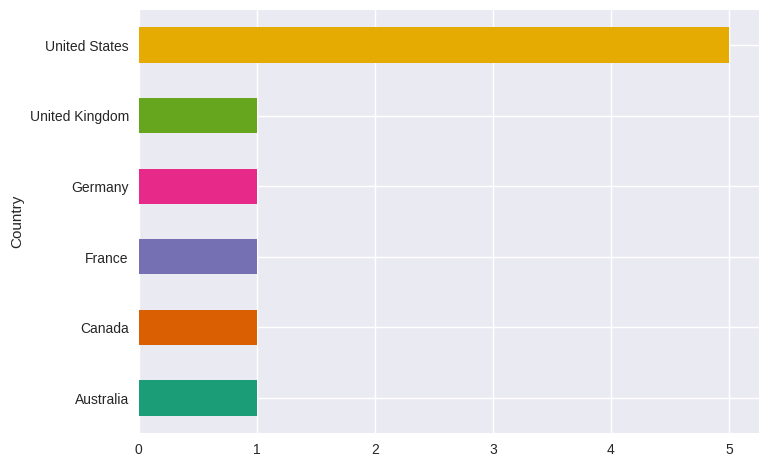

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

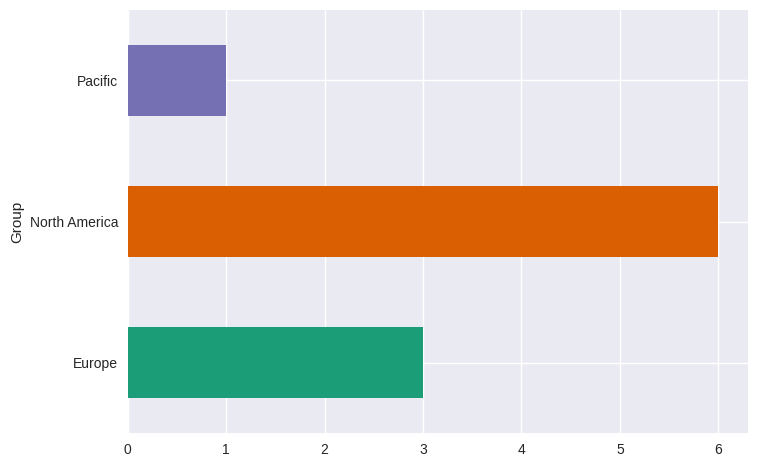

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Most profitable territories/territórios mais lucrativos
profitable_territories = round(df.groupby(['SalesTerritoryKey', 'Region', 'Country', 'Group'])['Sales'].sum(), 2).reset_index()
profitable_territories.sort_values(by='Sales', ascending=False)

,SalesTerritoryKey,Region,Country,Group,Sales
3,4,Southwest,United States,North America,18001116.10
5,6,Canada,Canada,North America,13875632.96
0,1,Northwest,United States,North America,12004822.45
4,5,Southeast,United States,North America,7638606.55
2,3,Central,United States,North America,7633386.86
1,2,Northeast,United States,North America,6715354.39
6,7,France,France,Europe,4527839.69
9,10,United Kingdom,United Kingdom,Europe,3883042.96
7,8,Germany,Germany,Europe,1877743.39
8,9,Australia,Australia,Pacific,1391024.85


In [ ]:
#Relative performance by employee and reseller within each territory/Desempenho relativo por colaborador e revendedor dentro de cada território.
employee_performance = round(df.groupby(['EmployeeKey', 'ResellerKey', 'SalesTerritoryKey', 'Region', 'Country', 'Group'])['Sales'].sum(), 2).reset_index()
employee_performance.sort_values(by='Sales', ascending=False)

,EmployeeKey,ResellerKey,SalesTerritoryKey,Region,Country,Group,Sales
227,282,697,1,Northwest,United States,North America,861728.86
405,285,170,5,Southeast,United States,North America,773398.22
599,289,146,1,Northwest,United States,North America,725937.34
214,282,546,3,Central,United States,North America,676732.67
742,292,638,7,France,France,Europe,648107.78
...,...,...,...,...,...,...,...
5,272,116,5,Southeast,United States,North America,37.25
432,285,459,5,Southeast,United States,North America,24.29
555,288,304,10,United Kingdom,United Kingdom,Europe,21.56
322,283,544,3,Central,United States,North America,20.52


# **Employee Analysis(EmployeeKey)**

In [ ]:
#Ranking of employees with highest sales/Ranking de funcionários com maiores vendas
employee_sales = round(df.groupby('EmployeeKey')[['Sales', 'Profit']].sum(), 2).reset_index()
employee_sales.sort_values(by='Sales', ascending=False)

,EmployeeKey,Sales,Profit
2,282,10158634.52,6.839541e+09
3,283,9755992.01,7.525195e+09
1,281,8952751.48,6.730596e+09
11,291,8099816.95,6.370778e+09
5,285,6976128.29,5.247346e+09
7,287,6283193.33,4.354798e+09
8,288,5536439.26,4.156898e+09
12,292,4429368.45,3.309327e+09
9,289,3614760.61,2.144915e+09
4,284,3486102.49,3.136414e+09


In [ ]:
#Performance ranking by territory/Relação de desempenho por território
employee_territory = round(df.groupby(['EmployeeKey', 'SalesTerritoryKey', 'Region', 'Country', 'Group'])['Sales'].sum(), 2).reset_index()
employee_territory.sort_values(by='Sales', ascending=False)

,EmployeeKey,SalesTerritoryKey,Region,Country,Group,Sales
28,291,6,Canada,Canada,North America,8099816.95
17,285,5,Southeast,United States,North America,6976128.29
11,282,4,Southwest,United States,North America,6220557.14
21,287,4,Southwest,United States,North America,5076374.23
29,292,7,France,France,Europe,4429368.45
12,283,2,Northeast,United States,North America,3693029.95
24,289,1,Northwest,United States,North America,3614760.61
16,284,6,Canada,Canada,North America,3486102.49
23,288,10,United Kingdom,United Kingdom,Europe,3440481.64
7,281,4,Southwest,United States,North America,3332056.10


# **Resellers analysis(ResellerKey)**

In [ ]:
#Which resellers sell the most/Quais revendedores mais vendem
reseller_sales = round(df.groupby('ResellerKey')[['Sales', 'Profit']].sum(), 2).reset_index()
reseller_sales.sort_values(by='Sales', ascending=False)

,ResellerKey,Sales,Profit
627,697,882273.53,2.978494e+08
303,328,817125.03,4.357796e+08
459,514,803767.27,4.507721e+08
609,678,794909.73,4.687630e+08
157,170,773398.22,3.378292e+08
...,...,...,...
225,246,58.06,1.998989e+06
195,215,57.68,9.994946e+05
410,459,24.29,9.994946e+05
280,304,21.56,9.994946e+05


In [ ]:
#Relationship between resale regions and sales volume/Relação entre regiões de revenda e volume de vendas
reseller_region = round(df.groupby(['ResellerKey', 'Region'])['Sales'].sum(), 2).reset_index()
reseller_region.sort_values(by='Sales', ascending=False)

,ResellerKey,Region,Sales
627,697,Northwest,882273.53
303,328,Southwest,817125.03
459,514,Canada,803767.27
609,678,Canada,794909.73
157,170,Southeast,773398.22
...,...,...,...
225,246,Canada,58.06
195,215,Northeast,57.68
410,459,Southeast,24.29
280,304,United Kingdom,21.56


# **Product Analysis**

In [ ]:
#Ranking of best-selling products (Quantity) and most profitable products (Sales - Cost)/Ranking de produtos mais vendidos (Quantity) e mais lucrativos (Sales - Cost).
product_sales = round(df.groupby('Product')[['Sales', 'Profit']].sum(), 2).reset_index()
product_sales.sort_values(by='Sales', ascending=False)

,Product,Sales,Profit
142,"Mountain-200 Black, 38",2944665.88,6.386770e+08
143,"Mountain-200 Black, 42",2517355.08,5.397271e+08
145,"Mountain-200 Silver, 38",2240091.34,4.757594e+08
146,"Mountain-200 Silver, 42",2108685.83,4.607670e+08
147,"Mountain-200 Silver, 46",2038938.83,4.527710e+08
...,...,...,...
166,Patch Kit/8 Patches,831.11,1.509237e+08
89,"LL Touring Frame - Blue, 58",800.20,1.998989e+06
132,"Mountain Bike Socks, L",513.00,4.397776e+07
4,"Classic Vest, L",457.20,5.996967e+06


In [ ]:
#Comparison between Unit Price and Standard Cost → margin / Comparação entre Preço Unitário (Unit Price) e Custo Padrão (Standard Cost) → margem.
product_margin = round(df.groupby('Product')[['Unit Price', 'Standard Cost']].sum(), 2)
product_margin['Margin'] = product_margin['Unit Price'] - product_margin['Standard Cost']
product_margin

,Unit Price,Standard Cost,Margin
Product,,,
AWC Logo Cap,6015.57,6853.20,-837.63
Bike Wash - Dissolver,1791.23,1122.66,668.57
Cable Lock,3881.50,2670.29,1211.21
Chain,2681.74,1986.79,694.95
"Classic Vest, L",228.60,142.50,86.10
...,...,...,...
"Women's Mountain Shorts, M",12597.00,7854.00,4743.00
"Women's Mountain Shorts, S",12726.55,8115.80,4610.75
"Women's Tights, L",19594.63,13516.41,6078.22


In [ ]:
#Impact subcategory and category on sales / Impacto da subcategoria e categoria nas vendas
product_subcategory = round(df.groupby(['Subcategory', 'Category'])['Sales'].sum(), 2).reset_index()
product_subcategory.sort_values(by='Sales', ascending=False)

,Subcategory,Category,Sales
22,Road Bikes,Bikes,28681899.48
18,Mountain Bikes,Bikes,25880152.86
29,Touring Bikes,Bikes,9506980.82
19,Mountain Frames,Components,4493533.42
23,Road Frames,Components,3746817.13
30,Touring Frames,Components,1463309.26
32,Wheels,Components,679676.89
16,Jerseys,Clothing,549933.91
25,Shorts,Clothing,325297.09
14,Helmets,Accessories,250209.76


# **Time Analysis (OrderDate)**

In [ ]:
#Sales evolution over time (day, month, year) / Evolução das vendas ao longo do tempo (dia, mês, ano)
time_sales = round(df.groupby(['Year'])['Sales'].sum(), 2).reset_index()
time_sales.sort_values(by='Year', ascending=False)


,Year,Sales
3,2020,12650022.79
2,2019,32500005.58
1,2018,24328786.25
0,2017,8069755.58


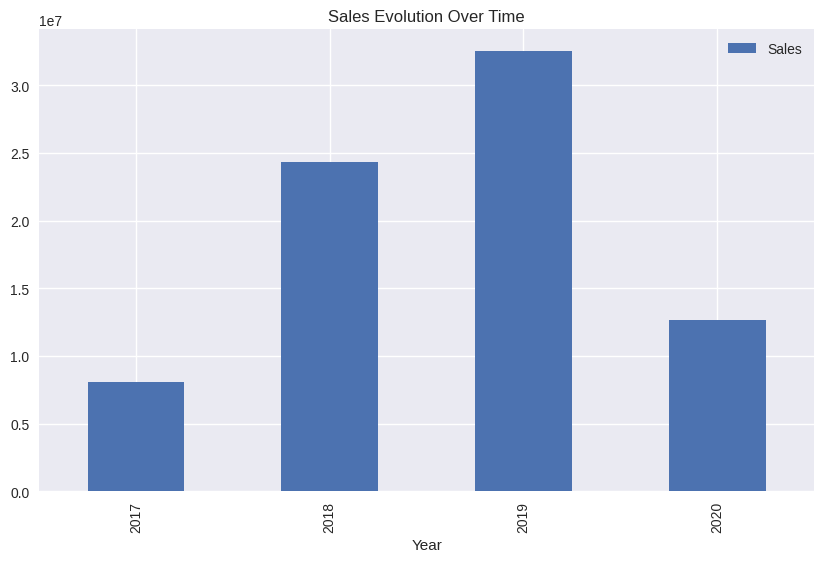

In [ ]:
time_sales.plot(x='Year', y='Sales', kind='bar', figsize=(10, 6), title ='Sales Evolution Over Time')
plt.show()